_**2. WAP to implement a multi-layer perceptron (MLP) network with one hidden layer using numpy in Python. Demonstrate that it can learn the XOR Boolean function.**_

### **Perceptron Algorithm XOR NAND**

---

This code implements a Multi-Layer Perceptron (MLP) to learn the XOR function using NumPy. Here's a breakdown:

### **1\. Class Definition (`MLP`)**

The `MLP` class encapsulates all functionality required for training and evaluating the neural network.

#### **Initialization (`__init__`)**

- Defines the structure:
  - **Input layer**: 2 neurons (for the two inputs in XOR)
  - **Hidden layer**: 2 neurons (to capture non-linearity)
  - **Output layer**: 1 neuron (binary classification)
- Initializes weights and biases randomly.
- Uses a **fixed seed** (`np.random.seed(42)`) for reproducibility.
- Sets learning rate (`0.1`) and number of epochs (`10000`).

#### **Activation Functions**

- **Sigmoid function (`sigmoid`)**:
  - Ensures output is in range (0,1).
  - Used in both hidden and output layers.
- **Sigmoid derivative (`sigmoid_derivative`)**:
  - Needed for backpropagation to compute weight updates.

---

### **2\. Training (`train`)**

The `train` method performs **forward and backward propagation**:

- **Forward Pass**:
  - Computes activations for the hidden and output layers.
- **Error Calculation**:
  - Uses Mean Absolute Error (MAE) as a loss function.
- **Backpropagation**:
  - Computes gradients using **sigmoid derivative**.
  - Updates weights and biases using **Gradient Descent**.
- **Logging**:
  - Prints the loss every 1000 epochs.

---

### **3\. Prediction (`predict`)**

- Performs forward propagation.
- Converts sigmoid output to binary (0 or 1) based on a 0.5 threshold.

---

### **4\. Evaluation (`evaluate`)**

- Uses **accuracy score** and **confusion matrix** to assess performance.

---

### **5\. Visualization**

#### **Loss Curve (`plot_loss_curve`)**

- Plots how the loss decreases over epochs.

#### **Decision Boundary (`plot_decision_boundary`)**

- Uses **meshgrid** to visualize how the perceptron classifies different input regions.

---

### **6\. Running the Model**

- **XOR dataset** is defined: `[[0,0], [0,1], [1,0], [1,1]]` with labels `[[0], [1], [1], [0]]`.
- Trains the model using `train()`.
- Evaluates performance using `evaluate()`.
- Plots:
  - **Loss curve** (`plot_loss_curve`).
  - **Decision boundary** (`plot_decision_boundary`).

---

### **Expected Outcome**

1. **Accuracy ≈ 100%** (since MLP can solve XOR).
2. **Loss should decrease over time**.
3. **Clear decision boundary separating 1s and 0s**.


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

class MLP:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.1, epochs=10000):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate
        self.epochs = epochs
        
        # Initialize weights and biases
        # np.random.seed(42)
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
        self.loss_history = []
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def train(self, X, y):
        for epoch in range(self.epochs):
            # Forward pass
            hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
            hidden_layer_output = self.sigmoid(hidden_layer_input)
            output_layer_input = np.dot(hidden_layer_output, self.weights_hidden_output) + self.bias_output
            output_layer_output = self.sigmoid(output_layer_input)
            
            # Compute error
            error = y - output_layer_output
            loss = np.mean(np.abs(error))
            self.loss_history.append(loss)
            
            # Backpropagation
            output_gradient = error * self.sigmoid_derivative(output_layer_output)
            hidden_error = np.dot(output_gradient, self.weights_hidden_output.T)
            hidden_gradient = hidden_error * self.sigmoid_derivative(hidden_layer_output)
            
            # Update weights and biases
            self.weights_hidden_output += np.dot(hidden_layer_output.T, output_gradient) * self.learning_rate
            self.weights_input_hidden += np.dot(X.T, hidden_gradient) * self.learning_rate
            self.bias_output += np.sum(output_gradient, axis=0, keepdims=True) * self.learning_rate
            self.bias_hidden += np.sum(hidden_gradient, axis=0, keepdims=True) * self.learning_rate
            
            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Loss = {loss}")
    
    def predict(self, X):
        hidden_layer_activation = self.sigmoid(np.dot(X, self.weights_input_hidden) + self.bias_hidden)
        final_output = self.sigmoid(np.dot(hidden_layer_activation, self.weights_hidden_output) + self.bias_output)
        return (final_output > 0.5).astype(int)
    
    def evaluate(self, X, y):
        predictions = self.predict(X)
        accuracy = accuracy_score(y, predictions)
        conf_matrix = confusion_matrix(y, predictions)
        print(f"Accuracy: {accuracy * 100:.2f}%")
        print("Confusion Matrix:")
        print(conf_matrix)
        
    def plot_loss_curve(self):
        plt.figure()
        plt.plot(self.loss_history, label='Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.legend()
        plt.show()
        
    def plot_decision_boundary(self, X, y):
        x_min, x_max = -0.5, 1.5
        y_min, y_max = -0.5, 1.5
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
        Z = np.array([self.predict(np.array([[x, y]])) for x, y in zip(xx.ravel(), yy.ravel())])
        Z = Z.reshape(xx.shape)
        
        plt.contourf(xx, yy, Z, alpha=0.3)
        plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), edgecolors='k', marker='o')
        plt.xlabel("Input 1")
        plt.ylabel("Input 2")
        plt.title("Decision Boundary of XOR MLP")
        plt.show()

# 0 Hidden Layer

Epoch 0: Loss = 0.5
Epoch 1000: Loss = 0.5
Epoch 2000: Loss = 0.5
Epoch 3000: Loss = 0.5
Epoch 4000: Loss = 0.5
Epoch 5000: Loss = 0.5
Epoch 6000: Loss = 0.5
Epoch 7000: Loss = 0.5
Epoch 8000: Loss = 0.5
Epoch 9000: Loss = 0.5
Accuracy: 50.00%
Confusion Matrix:
[[2 0]
 [2 0]]


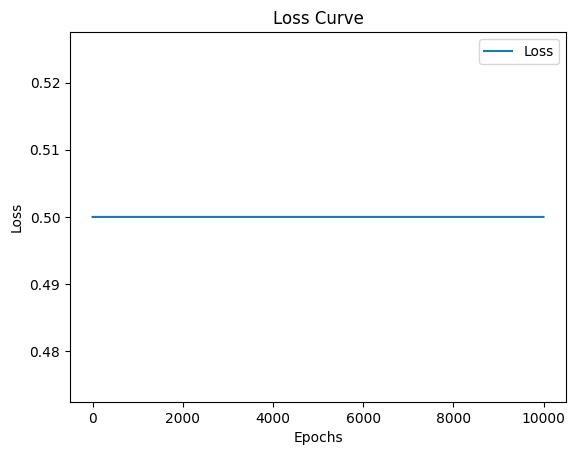

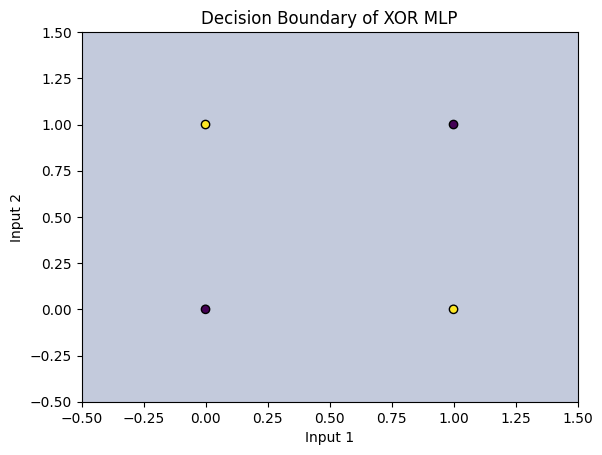

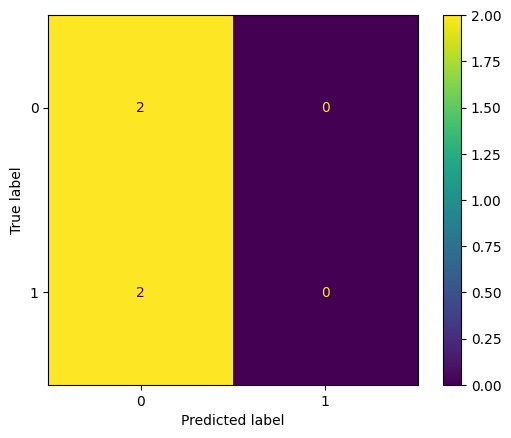

In [46]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=0, output_size=1, learning_rate=0.1, epochs=10000)
mlp.train(X, y)

# Evaluate performance
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)

cm = confusion_matrix(y, mlp.predict(X))
ConfusionMatrixDisplay(cm).plot()

### 1 Hiddedn Layer

Epoch 0: Loss = 0.5021551260128616
Epoch 1000: Loss = 0.4495849276896011
Epoch 2000: Loss = 0.39177328864918715
Epoch 3000: Loss = 0.3709478653741254
Epoch 4000: Loss = 0.36184917772839853
Epoch 5000: Loss = 0.3567541157045663
Epoch 6000: Loss = 0.3534649587860982
Epoch 7000: Loss = 0.35114645239738757
Epoch 8000: Loss = 0.3494125059775595
Epoch 9000: Loss = 0.3480595746269967
Accuracy: 75.00%
Confusion Matrix:
[[1 1]
 [0 2]]


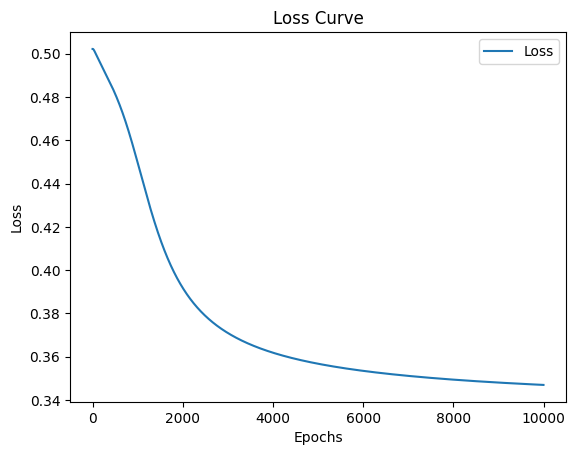

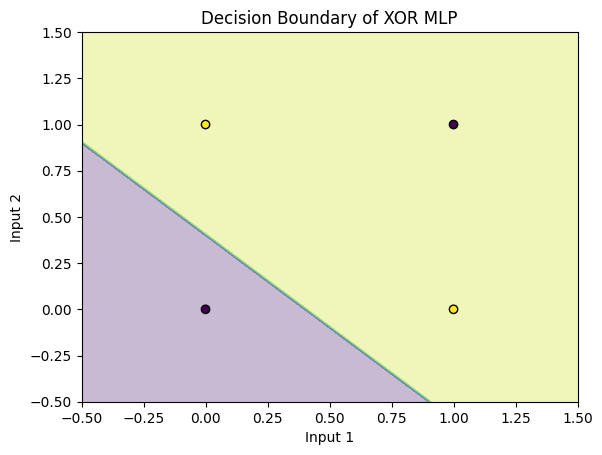

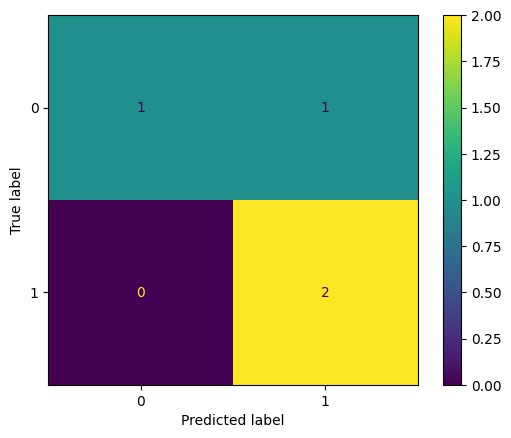

In [47]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=1, output_size=1, learning_rate=0.1, epochs=10000)
mlp.train(X, y)

# Evaluate performance
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)

cm = confusion_matrix(y, mlp.predict(X))
ConfusionMatrixDisplay(cm).plot()

### 2 Hidden layer

Epoch 0: Loss = 0.5070912090599501
Epoch 1000: Loss = 0.4997310099084491
Epoch 2000: Loss = 0.48550064134252735
Epoch 3000: Loss = 0.3905184570581085
Epoch 4000: Loss = 0.22309855213057223
Epoch 5000: Loss = 0.13095005775606627
Epoch 6000: Loss = 0.09542642087946543
Epoch 7000: Loss = 0.07721351558471974
Epoch 8000: Loss = 0.066016049627855
Epoch 9000: Loss = 0.05834530296645312
Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


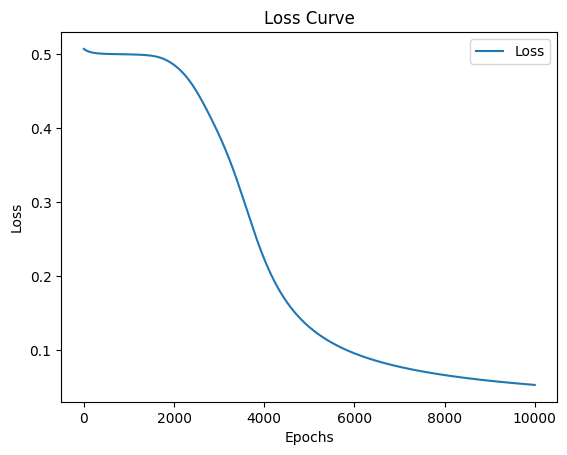

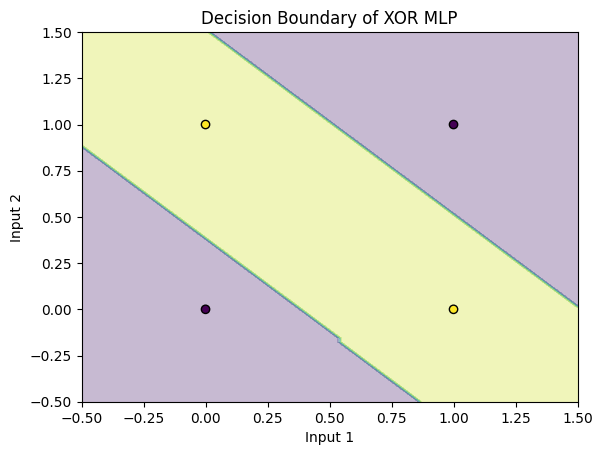

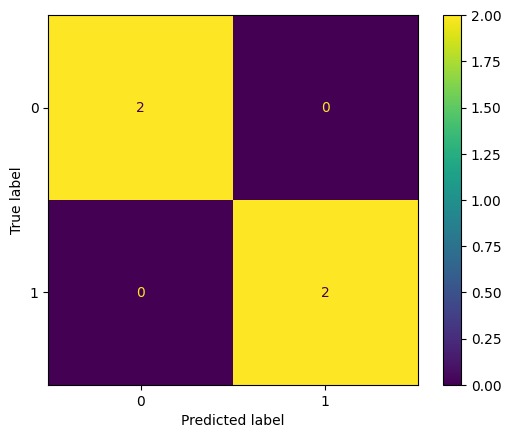

In [48]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=2, output_size=1, learning_rate=0.1, epochs=10000)
mlp.train(X, y)

# Evaluate performance
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)

cm = confusion_matrix(y, mlp.predict(X))
ConfusionMatrixDisplay(cm).plot()

### 3 Hidden Layer

Epoch 0: Loss = 0.49767303446356537
Epoch 1000: Loss = 0.450517456728437
Epoch 2000: Loss = 0.3558934610885862
Epoch 3000: Loss = 0.19909481121494824
Epoch 4000: Loss = 0.1200876930987407
Epoch 5000: Loss = 0.08806101646877229
Epoch 6000: Loss = 0.07121487189797843
Epoch 7000: Loss = 0.06075136894037865
Epoch 8000: Loss = 0.053554674939965005
Epoch 9000: Loss = 0.04825991379768285
Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


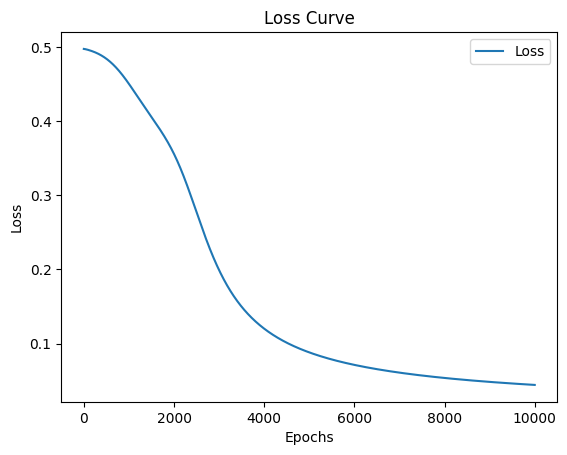

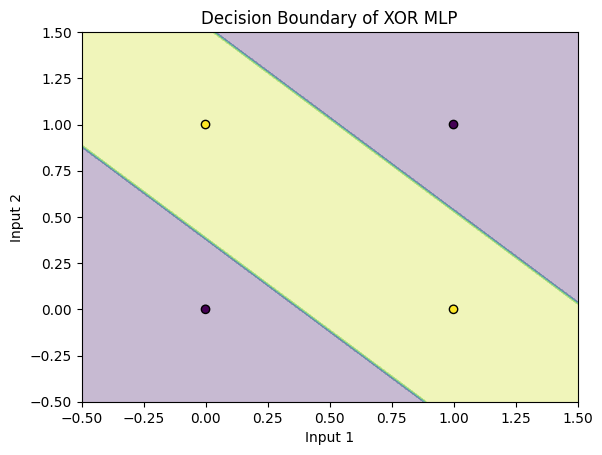

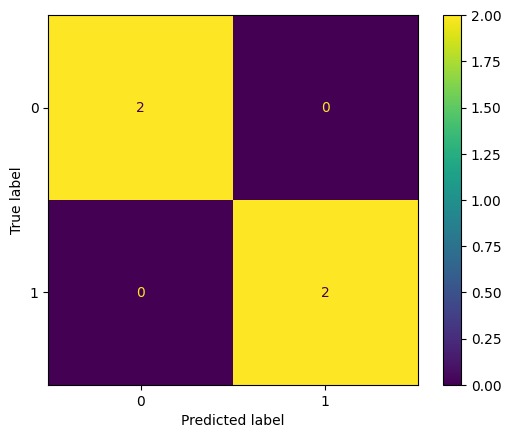

In [49]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=3, output_size=1, learning_rate=0.1, epochs=10000)
mlp.train(X, y)

# Evaluate performance
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)

cm = confusion_matrix(y, mlp.predict(X))
ConfusionMatrixDisplay(cm).plot()

### 4 Hidden Layer

Epoch 0: Loss = 0.5015900592901205
Epoch 1000: Loss = 0.4481697121735224
Epoch 2000: Loss = 0.2800556444673535
Epoch 3000: Loss = 0.14475591758195483
Epoch 4000: Loss = 0.0953207953302494
Epoch 5000: Loss = 0.07293242107111873
Epoch 6000: Loss = 0.06024759479556621
Epoch 7000: Loss = 0.05202040120448832
Epoch 8000: Loss = 0.04620591004190838
Epoch 9000: Loss = 0.04184900743242716
Accuracy: 100.00%
Confusion Matrix:
[[2 0]
 [0 2]]


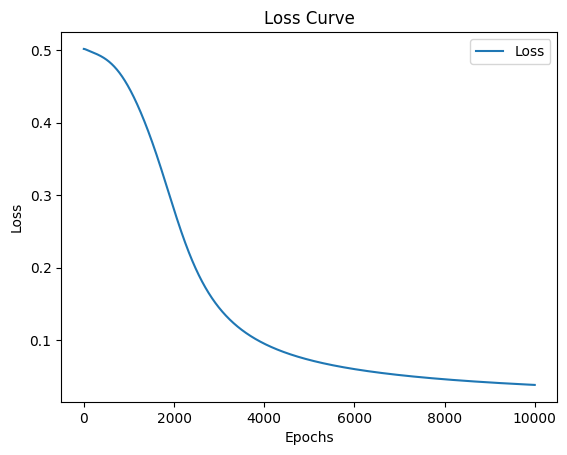

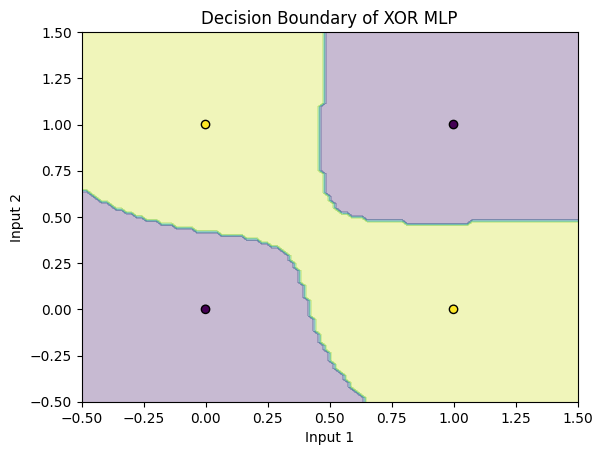

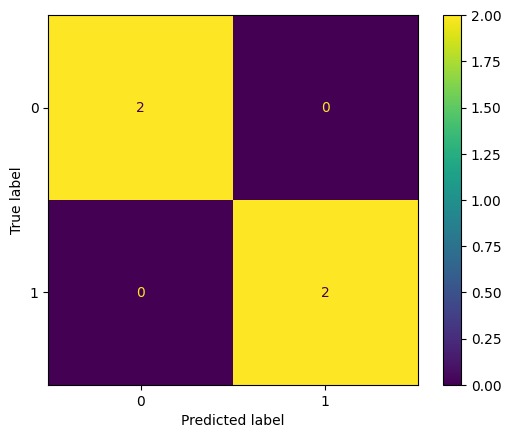

In [50]:
# Initialize dataset (XOR truth table)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Train MLP
mlp = MLP(input_size=2, hidden_size=4, output_size=1, learning_rate=0.1, epochs=10000)
mlp.train(X, y)

# Evaluate performance
mlp.evaluate(X, y)
mlp.plot_loss_curve()
mlp.plot_decision_boundary(X, y)

cm = confusion_matrix(y, mlp.predict(X))
ConfusionMatrixDisplay(cm).plot()